# SVM for classification, without and with kernels

In this notebook we are going to explore the use of Support Vector Machines (SVMs) for image classification. We are going to use the famous MNIST dataset, that is a dataset of handwritten digits. We get the data from mldata.org, that is a public repository for machine learning data.

The dataset consists of 70,000 images of handwritten digits (i.e., 0, 1, ... 9). Each image is 28 pixels by 28 pixels and we can think of it as a vector of 28x28 = 784 numbers. Each number is an integer between 0 and 255. For each image we have the corresponding label (i.e., 0, 1, ..., 9).

In [20]:
#load the required packages

%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml

In [21]:
#fix your ID ("numero di matricola") and the seed for random generator
ID = 6 # COMPLETE
np.random.seed(ID)

Now let's load the dataset. 'data' contains the input, 'target' contains the label. We normalize the data by dividing each value by 255 so that each value is in [0,1]

In [22]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
mnist = fetch_openml('mnist_784', version=1)
# rescale the data
X, y = mnist.data.values / 255., mnist.target.values

Now split into training and test. We keep 500 samples in the training set. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

**IMPORTANT**: if you cannot run the SVM with 500 samples or 1000 samples (see below), try with a smaller number of samples (e.g. 200 here and 400 below).

In [23]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts = True)

Labels and frequencies in training dataset: 


(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([56, 51, 54, 49, 58, 40, 50, 69, 35, 38], dtype=int64))

We now provide a function to print an image in the dataset and the corresponding true label given the index of the image in the dataset.

In [24]:
#function for plotting a digit and printing the corresponding labe
def plot_digit(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %s" % labels[index])
    return

As an example, let's print the 100-th image in X_train and the 40,000-th image in X_test and their true labels.

INPUT:


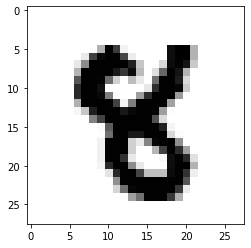

LABEL: 8
INPUT:


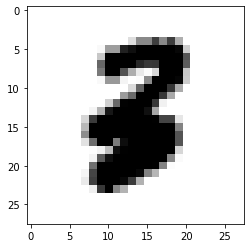

LABEL: 3


In [25]:
#let's try the plotting function
plot_digit(X_train,y_train,100)
plot_digit(X_test,y_test,40000)

## TO DO 1
Run SVM with 5-fold cross validation to pick the best kernel and values of parameters. We provide some potential choice for parameters, but change the grid if needed (e.g., it takes too long). For the SVM for classification use SVC from sklearn.svm; for the grid search we suggest you use GridSearchCV from sklearn.model_selection, but you can implement your own cross-validation for model selection if you prefer.

Finally, print the best parameters used as well as the score obtained by the best model

In [26]:
#3th try
#import SVC
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score #import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [1, 10, 100]}

#run linear SVM
linear_SVM = SVC(kernel='linear')

#find best model using 5-fold CV 
#and train it using all the training data
grid = GridSearchCV(linear_SVM, parameters)
grid.fit(X_train, y_train)

accuracies = cross_val_score(estimator = grid, X = X_train, y = y_train, cv = 5)
print ('RESULTS FOR LINEAR KERNEL\n')

print("Best parameters set found:")
print(grid.best_params_) # ADD CODE

print("Score with best parameters:")
print(grid.best_score_) # ADD CODE

print("\nAll scores on the grid:")
print(grid.cv_results_['mean_test_score']) # ADD CODE

# parameters for poly with degree 2 kernel
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with poly of degree 2 kernel
poly2_SVM = SVC(kernel='poly',degree=2)

# ADD CODE: DO THE SAME AS ABOVE FOR POLYNOMIAL KERNEL WITH DEGREE=2
#find best model using 5-fold CV 
#and train it using all the training data
grid_poly = GridSearchCV(poly2_SVM, parameters)
grid_poly.fit(X_train, y_train)

accuracies_poly = cross_val_score(estimator = grid_poly, X = X_train, y = y_train, cv = 5)
print ('\nRESULTS FOR POLY DEGREE=2 KERNEL\n')

print("Best parameters set found:")
print(grid_poly.best_params_) # ADD CODE

print("Score with best parameters:")
print(grid_poly.best_score_) # ADD CODE

print("\nAll scores on the grid:")
print(grid_poly.cv_results_['mean_test_score']) # ADD CODE

# parameters for rbf SVM
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with rbf kernel
rbf_SVM = SVC(kernel='rbf')
# ADD CODE: DO THE SAME AS ABOVE FOR RBF KERNEL
#find best model using 5-fold CV 
#and train it using all the training data

grid_rbf = GridSearchCV(rbf_SVM, parameters)
grid_rbf.fit(X_train, y_train)

accuracies_poly = cross_val_score(estimator = grid_rbf, X = X_train, y = y_train, cv = 5)
print ('\nRESULTS FOR rbf KERNEL\n')

print("Best parameters set found:")
print(grid_rbf.best_params_) # ADD CODE

print("Score with best parameters:")
print(grid_rbf.best_score_) # ADD CODE

print("\nAll scores on the grid:")
print(grid_rbf.cv_results_['mean_test_score']) # ADD CODE

RESULTS FOR LINEAR KERNEL

Best parameters set found:
{'C': 1}
Score with best parameters:
0.8559999999999999

All scores on the grid:
[0.856 0.856 0.856]

RESULTS FOR POLY DEGREE=2 KERNEL

Best parameters set found:
{'C': 1, 'gamma': 0.1}
Score with best parameters:
0.8700000000000001

All scores on the grid:
[0.814 0.87  0.87  0.87  0.87  0.87  0.87  0.87  0.87 ]

RESULTS FOR rbf KERNEL

Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.8960000000000001

All scores on the grid:
[0.87  0.556 0.138 0.896 0.596 0.138 0.896 0.596 0.138]


## TO DO 2
For the "best" SVM kernel and choice of parameters from above, train the model on the entire training set and measure the training error. Also make predictions on the test set and measure the test error. Print the training and the test error.

In [27]:
#get training and test error for the best SVM model from CV
best_SVM = grid_rbf # ADD CODE

# fit the model on the entire training set
# ADD CODE
best_SVM.fit(X_train, y_train)

#get the training and test error
training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.106993


## Use logistic regression for comparison

## TO DO 3

Just for comparison let's also use logistic regression, first with the default values of the parameter for regularization and then with cross-validation to fix the value of the parameters. For cross validation, use 5-fold cross validation and the default values of the regularization parameters for the function linear_model.LogisticRegressionCV(...).

Note: during training you may receive a "ConvergenceWarning" that indicates that the logistic regression solver did not converge to the optimal result. Given the scope of the notebook, we can ignore such warning but in real-world scenarios you should take corrective measures such as increasing the number of training iterations and/or the runtime for training or picking a different optimizer

In [28]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegressionCV


lr = linear_model.LogisticRegression()
# fit the model on the training data
lr.fit(X_train, y_train)# ADD CODE

#compute training and test error for model above

training_error = 1-  lr.score(X_train, y_train)
test_error = 1 - lr.score(X_test, y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

#logistic regression with 5-fold CV: you can use use linear_model.LogisticRegressionCV
# use 5-fold CV to find the best choice of the parameter, than train
# the model on the entire training set
lr_cv = LogisticRegressionCV(cv=5, random_state=0).fit(X_train, y_train) # COMPLETE
training_error_cv = 1 -  lr_cv.score(X_train, y_train) # COMPLETE
test_error_cv = 1 - lr_cv.score(X_test, y_test) # COMPLETE

print ("Best logistic regression training error with CV: %f" % training_error_cv)
print ("Best logistic regression test error with CV: %f" % test_error_cv)

C:\Users\Me\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best logistic regression training error: 0.000000
Best logistic regression test error: 0.148158


C:\Users\Me\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Me\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best logistic regression training error with CV: 0.000000
Best logistic regression test error with CV: 0.149741


## TO DO 4 
Compare and comment the results from SVM and logistic regression.

test error in logistic regression almost is equal to test error on the worse SVM. In overall rbf is the best and has lowest test error which is important for us.

## TO DO 5
Write the code that finds and plots a digit that is missclassified by logistic regression (optimized for the regularization parameter) and correctly classified by the "best" SVM.

5
INPUT:


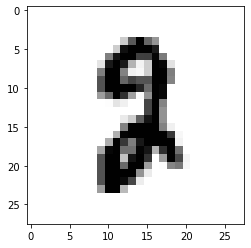

LABEL: 2


In [30]:
# in this cell we show an sample in dataset which is predict correct by SVM  but logistic regression does not successful
not_true_both_idx = 0
pred_log = lr_cv.predict(X_test)
pred_svm = best_SVM.predict(X_test)

for i in range(len(X_test)):    
    if ((pred_log[i] != y_test[i]) and (pred_svm[i] ==y_test[i])):
        not_true_both_idx = i
        break

print(not_true_both_idx)   
plot_digit(X_test,y_test,not_true_both_idx)

## More data
Now let's do the same but using 1000 data points for training. 

## TO DO 6
Repeat the entire analysis above using 1000 samples. Of course you can copy the code from above (but no need to copy markdown comments).

Labels and frequencies in training dataset: 
RESULTS FOR LINEAR KERNEL

Best parameters set found:
{'C': 1}
Score with best parameters:
0.8779999999999999

All scores on the grid:
[0.878 0.878 0.878]

RESULTS FOR POLY DEGREE=2 KERNEL

Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.905

All scores on the grid:
[0.892 0.903 0.903 0.905 0.903 0.903 0.903 0.903 0.903]

RESULTS FOR rbf KERNEL

Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.9179999999999999

All scores on the grid:
[0.909 0.676 0.122 0.918 0.71  0.122 0.918 0.71  0.122]
Best SVM training error: 0.000000
Best SVM test error: 0.080710


C:\Users\Me\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best logistic regression training error: 0.000000
Best logistic regression test error: 0.131942


C:\Users\Me\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Me\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best logistic regression training error with CV: 0.051000
Best logistic regression test error with CV: 0.130261
21
INPUT:


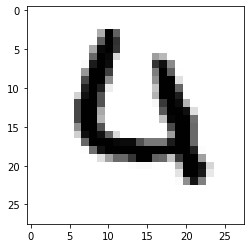

LABEL: 4


In [31]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 1000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts = True)

#==============================================
#3th try
#import SVC
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score #import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [1, 10, 100]}

#run linear SVM
linear_SVM = SVC(kernel='linear')

#find best model using 5-fold CV 
#and train it using all the training data
grid = GridSearchCV(linear_SVM, parameters)
grid.fit(X_train, y_train)

accuracies = cross_val_score(estimator = grid, X = X_train, y = y_train, cv = 5)
print ('RESULTS FOR LINEAR KERNEL\n')

print("Best parameters set found:")
print(grid.best_params_) # ADD CODE

print("Score with best parameters:")
print(grid.best_score_) # ADD CODE

print("\nAll scores on the grid:")
print(grid.cv_results_['mean_test_score']) # ADD CODE

# parameters for poly with degree 2 kernel
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with poly of degree 2 kernel
poly2_SVM = SVC(kernel='poly',degree=2)

# ADD CODE: DO THE SAME AS ABOVE FOR POLYNOMIAL KERNEL WITH DEGREE=2
#find best model using 5-fold CV 
#and train it using all the training data
grid_poly = GridSearchCV(poly2_SVM, parameters)
grid_poly.fit(X_train, y_train)

accuracies_poly = cross_val_score(estimator = grid_poly, X = X_train, y = y_train, cv = 5)
print ('\nRESULTS FOR POLY DEGREE=2 KERNEL\n')

print("Best parameters set found:")
print(grid_poly.best_params_) # ADD CODE

print("Score with best parameters:")
print(grid_poly.best_score_) # ADD CODE

print("\nAll scores on the grid:")
print(grid_poly.cv_results_['mean_test_score']) # ADD CODE

# parameters for rbf SVM
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with rbf kernel
rbf_SVM = SVC(kernel='rbf')
# ADD CODE: DO THE SAME AS ABOVE FOR RBF KERNEL
#find best model using 5-fold CV 
#and train it using all the training data

grid_rbf = GridSearchCV(rbf_SVM, parameters)
grid_rbf.fit(X_train, y_train)

accuracies_poly = cross_val_score(estimator = grid_rbf, X = X_train, y = y_train, cv = 5)
print ('\nRESULTS FOR rbf KERNEL\n')

print("Best parameters set found:")
print(grid_rbf.best_params_) # ADD CODE

print("Score with best parameters:")
print(grid_rbf.best_score_) # ADD CODE

print("\nAll scores on the grid:")
print(grid_rbf.cv_results_['mean_test_score']) # ADD CODE

#================================================

#get training and test error for the best SVM model from CV
best_SVM = grid_rbf # ADD CODE

# fit the model on the entire training set
# ADD CODE
best_SVM.fit(X_train, y_train)

#get the training and test error
training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

#================================================

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegressionCV


lr = linear_model.LogisticRegression()
# fit the model on the training data
lr.fit(X_train, y_train)# ADD CODE

#compute training and test error for model above

training_error = 1-  lr.score(X_train, y_train)
test_error = 1 - lr.score(X_test, y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

#logistic regression with 5-fold CV: you can use use linear_model.LogisticRegressionCV
# use 5-fold CV to find the best choice of the parameter, than train
# the model on the entire training set
lr_cv = LogisticRegressionCV(cv=5, random_state=0).fit(X_train, y_train) # COMPLETE
training_error_cv = 1 -  lr_cv.score(X_train, y_train) # COMPLETE
test_error_cv = 1 - lr_cv.score(X_test, y_test) # COMPLETE

print ("Best logistic regression training error with CV: %f" % training_error_cv)
print ("Best logistic regression test error with CV: %f" % test_error_cv)


#========================================

not_true_both_idx = 0
pred_log = lr_cv.predict(X_test)
pred_svm = best_SVM.predict(X_test)

for i in range(len(X_test)):    
    if ((pred_log[i] != y_test[i]) and (pred_svm[i] ==y_test[i])):
        not_true_both_idx = i
        break

print(not_true_both_idx)   
plot_digit(X_test,y_test,not_true_both_idx)

## TO DO 7
Compare and comment on the differences with the results above.

exactly the same as before(500 sample s in dataset) also with 1000 samples we saw the same result. 
although the test error decrease in all deffrent method, rbf still is the beset and logistic regression almost is equal to test error on the worse SVM